In [9]:
import numpy as np
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

cl.OCLArray([[4496., 5212., 6863., ..., 2917., 2680., 2642.],
       [4533., 5146., 7555., ..., 2843., 2857., 2748.],
       [4640., 6082., 8452., ..., 3372., 3039., 3128.],
       ...,
       [1339., 1403., 1359., ..., 4458., 4314., 4795.],
       [1473., 1560., 1622., ..., 3967., 4531., 4204.],
       [1380., 1368., 1649., ..., 3091., 3558., 3682.]], dtype=float32)
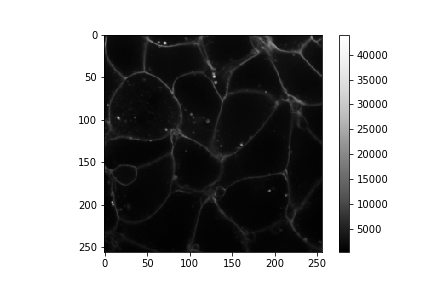
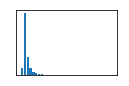

In [2]:
membranes = cle.imread("../../data/membranes.tif")
membranes


cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28]], dtype=uint32)
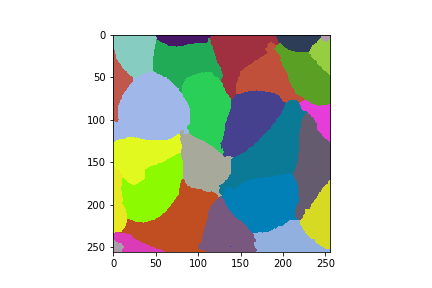

In [6]:
labels = cle.imread("../../data/membranes_labeled.tif").astype(np.uint32)
labels

radius = 0


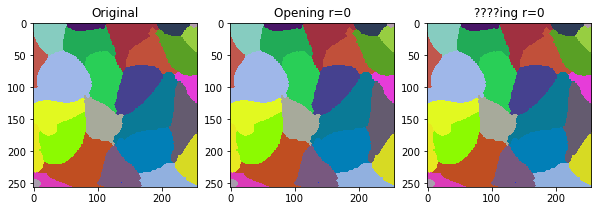

radius = 1


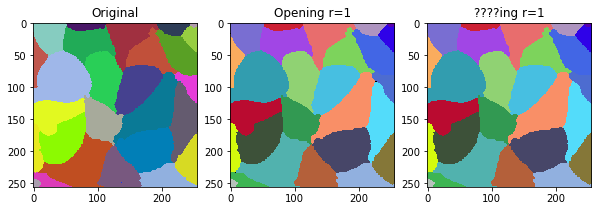

radius = 2


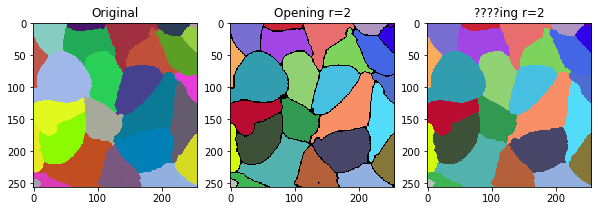

radius = 3


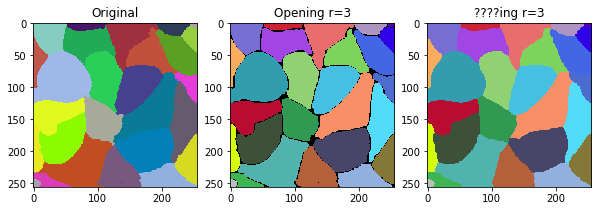

radius = 4


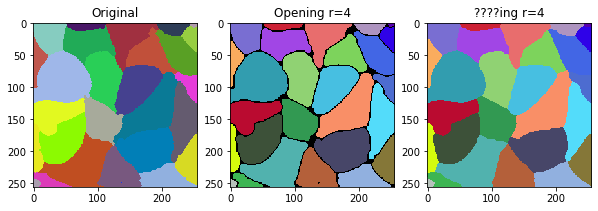

radius = 5


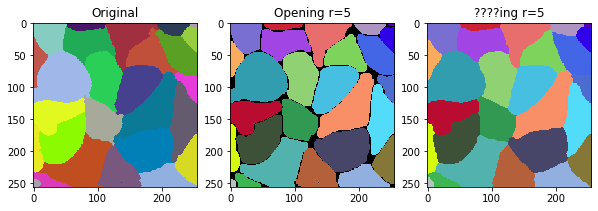

radius = 6


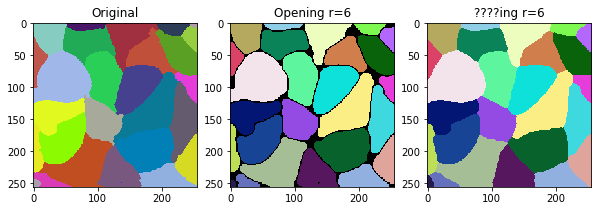

radius = 7


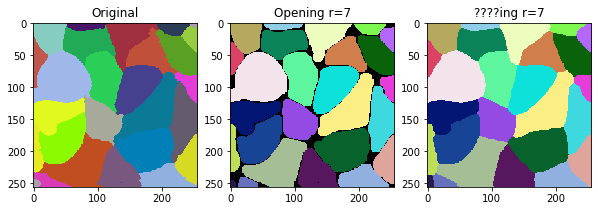

radius = 8


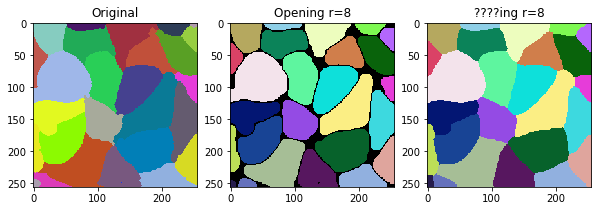

radius = 9


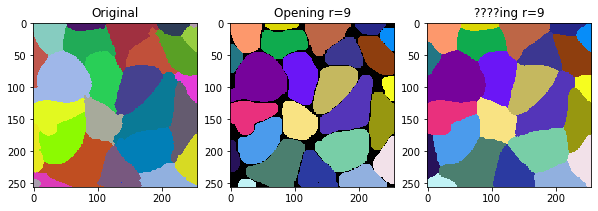

radius = 10


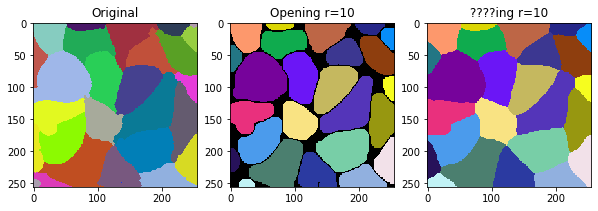

radius = 11


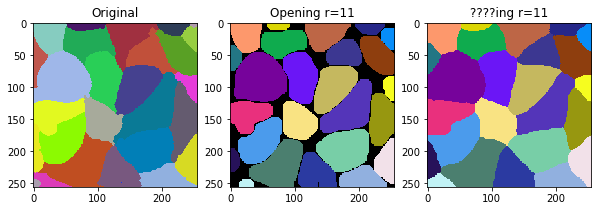

radius = 12


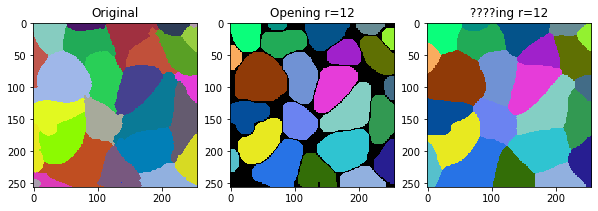

radius = 13


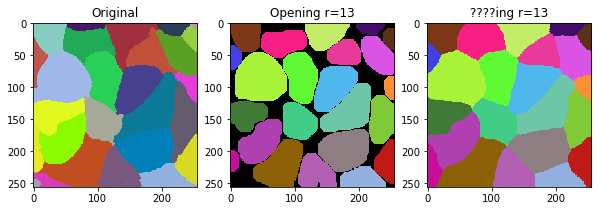

radius = 14


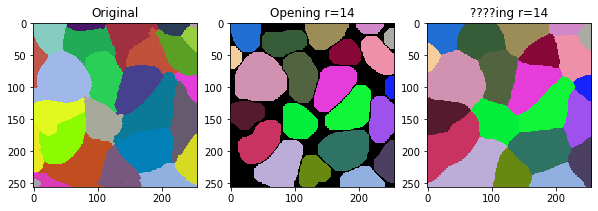

radius = 15


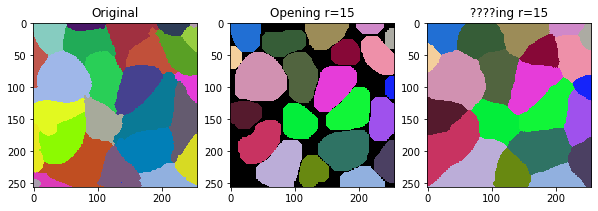

radius = 16


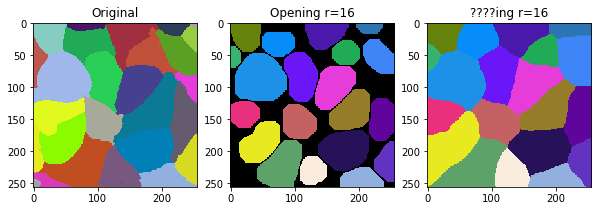

radius = 17


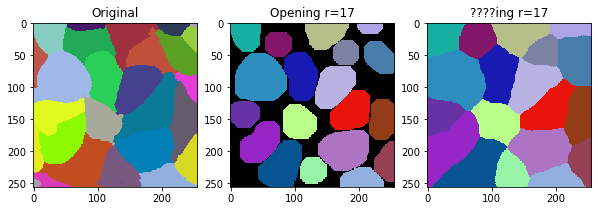

radius = 18


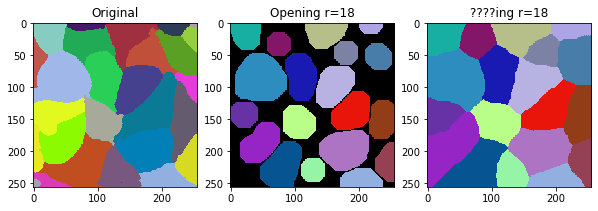

radius = 19


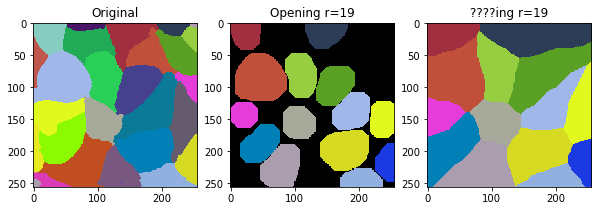

In [22]:
for r in range(20):
    print("radius =", r)
    
    fig, ax = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(labels, labels=True, plot=ax[0])
    cle.imshow(cle.opening_labels(labels, radius=r), labels=True, plot=ax[1])
    cle.imshow(cle.iron_labels(labels, radius=r), labels=True, plot=ax[2])
    
    ax[0].set_title("Original")
    ax[1].set_title("Opening r=" + str(r))
    ax[2].set_title("????ing r=" + str(r))
    plt.savefig("temp/" + str(r).zfill(2) + ".tif", dpi=300)
    plt.show()

In [ ]:
savefig